In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import OneHotEncoder
import torch
import kagglehub

In [40]:
# Read in csv file
df = pd.read_csv(r"insurance.csv").sort_values("smoker", ascending = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 556 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


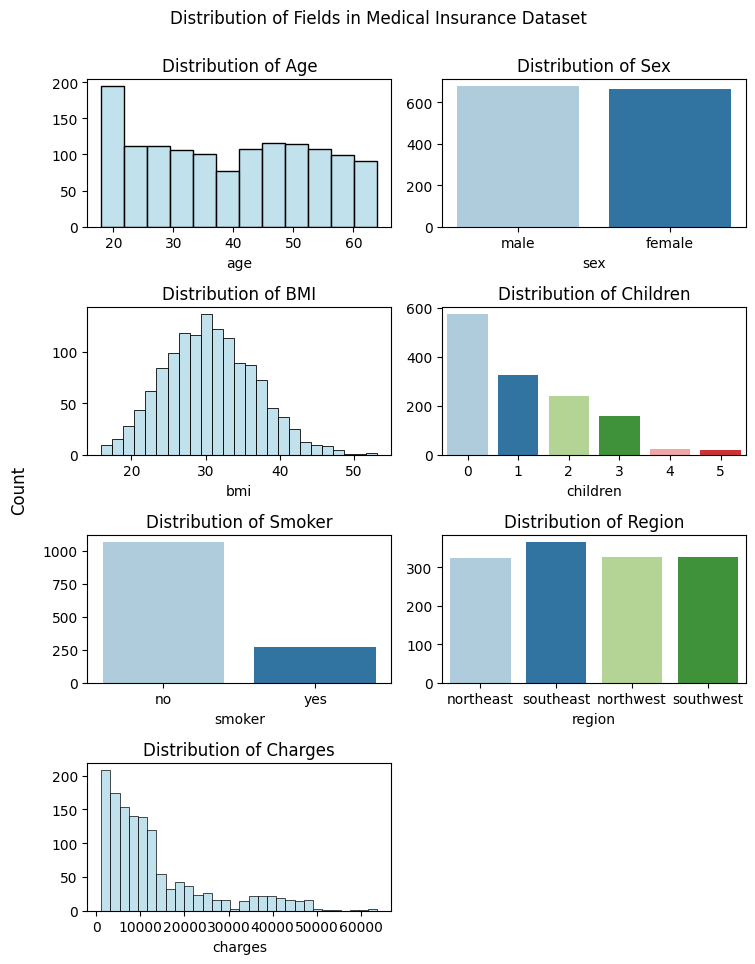

In [52]:
# First we do some EDA and see the distribution of the data

fig1, axes1 = plt.subplots(math.ceil(len(df.columns)/2), 2)

palette = "Paired"

# Remove extra plot for odd number of columns
if len(df.columns)%2 == 1:
    fig1.delaxes(axes1[-1,-1])

fig1.suptitle("Distribution of Fields in Medical Insurance Dataset", y = 1)
fig1.supylabel("Count")

for i, field in enumerate(df.columns):

    # Histplot for wider range numerical values
    if field in ["age", "bmi", "charges"]:
        sns.histplot(x = field, data = df, ax = axes1[i//2,i%2], color = "lightblue")
    # Countplot for categorical data or numerical with only a few values
    else:
        sns.countplot(x = field, data = df, ax = axes1[i//2,i%2], hue = field, palette = palette, legend = False)

    # Titles and axes labels for plots
    if field == "bmi":
        axes1[i//2,i%2].set_title(f"Distribution of {field.upper()}")
    else:
        axes1[i//2,i%2].set_title(f"Distribution of {field.capitalize()}")
    axes1[i//2,i%2].set_ylabel("")

# Layout of subplots
fig1.set_figheight(fig1.get_figheight()*2)
fig1.set_figwidth(fig1.get_figwidth()*1.2)
fig1.tight_layout()
plt.show()

C:\Users\Willi\AppData\Local\Temp\ipykernel_22280\183325687.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = field, y = "charges", data = data, ax = axes2[i//2, i%2], palette = palette)


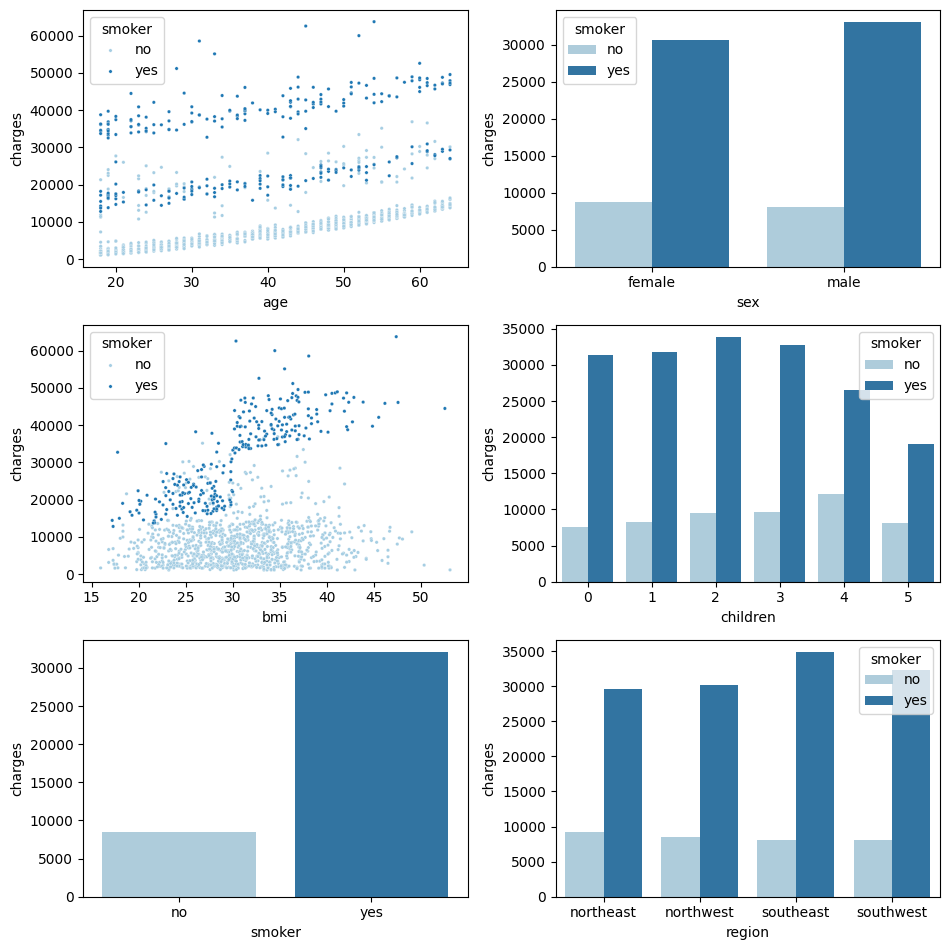

In [42]:
fig2, axes2 = plt.subplots(math.ceil((len(df.columns)-1)/2), 2)

# Remove extra plot for odd number of columns
if (len(df.columns)-1)%2 == 1:
    fig2.delaxes(axes2[-1,-1])

for i, field in enumerate(df.columns.drop(["charges"])):

    if field in ["age", "bmi"]:
        sns.scatterplot(x= field, y = "charges", data = df, ax = axes2[i//2, i%2], marker = "o", s = 6, hue = "smoker", palette = palette)
    
    elif field == "smoker":
        data = df.groupby(field)["charges"].mean().reset_index()
        sns.barplot(x = field, y = "charges", data = data, ax = axes2[i//2, i%2], palette = palette)
    else:
        data = df.groupby([field, "smoker"])["charges"].mean().reset_index()
        sns.barplot(x = field, y = "charges", data = data, ax = axes2[i//2, i%2], hue = "smoker", palette = palette)

fig2.set_figheight(fig2.get_figheight()*2)
fig2.set_figwidth(fig2.get_figwidth()*1.5)
fig2.tight_layout()
plt.show()

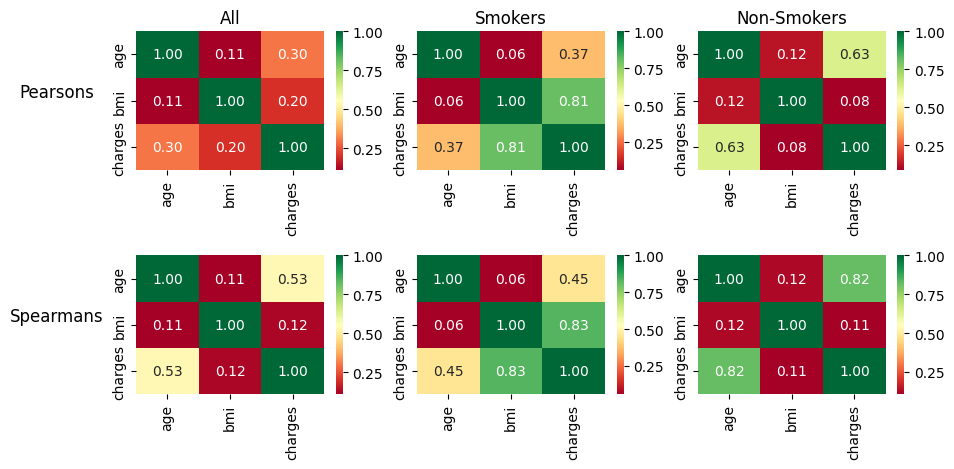

In [53]:
pcorr = df[["age","bmi","charges"]].corr()
pcorr_smoker = df[df["smoker"] == "yes"][["age","bmi","charges"]].corr()
pcorr_nonsmoker = df[df["smoker"] == "no"][["age","bmi","charges"]].corr()
scorr = df[["age","bmi","charges"]].corr("spearman")
scorr_smoker = df[df["smoker"] == "yes"][["age","bmi","charges"]].corr("spearman")
scorr_nonsmoker = df[df["smoker"] == "no"][["age","bmi","charges"]].corr("spearman")

fig3, axes3 = plt.subplots(2,3)

sns.heatmap(pcorr, annot = True, fmt = ".2f", cmap = "RdYlGn", ax=axes3[0,0])
sns.heatmap(pcorr_smoker, annot = True, fmt = ".2f", cmap = "RdYlGn", ax=axes3[0,1])
sns.heatmap(pcorr_nonsmoker, annot = True, fmt = ".2f", cmap = "RdYlGn", ax=axes3[0,2])
sns.heatmap(scorr, annot = True, fmt = ".2f", cmap = "RdYlGn", ax=axes3[1,0])
sns.heatmap(scorr_smoker, annot = True, fmt = ".2f", cmap = "RdYlGn", ax=axes3[1,1])
sns.heatmap(scorr_nonsmoker, annot = True, fmt = ".2f", cmap = "RdYlGn", ax=axes3[1,2])

axes3[0,0].set_title("All")
axes3[0,1].set_title("Smokers")
axes3[0,2].set_title("Non-Smokers")
axes3[0,0].set_ylabel("Pearsons", rotation = 0, size = "large", labelpad = 40)
axes3[1,0].set_ylabel("Spearmans", rotation = 0, size = "large", labelpad = 40)

fig3.set_figwidth(fig3.get_figwidth()*1.5)
fig3.tight_layout()


In [44]:
#df["smoker"] = df["smoker"].apply(lambda x: x == "yes")
#df["sex"] = df["sex"].apply(lambda x: x == "female")

# One-Hot encode the region variable
#df = pd.get_dummies(df, columns = ["region"])